In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import os

# 3.1 Image Filtering

In [2]:
def read_img(img_path):
  """
    Read grayscale image
    Inputs:
      img_path: str: image path
    Returns:
      img: cv2 image
  """
  return cv2.imread(img_path, 0)


def show_res(before_img, after_img):
  """
    Show the original image and the corresponding smooth image
    Inputs:
      before_img: cv2: image before smoothing
      after_img: cv2: corresponding smoothed image
    Return:
      None
  """
  plt.figure(figsize=(12, 9))
  plt.subplot(1, 2, 1)
  plt.imshow(before_img, cmap='gray')
  plt.title('Before')

  plt.subplot(1, 2, 2)
  plt.imshow(after_img, cmap='gray')
  plt.title('After')
  plt.show()

In [3]:
def padding_img(img, filter_size=3):
    """
        The surrogate function for the filter functions.
        The goal of the function: padding the image such that when applying the kernel with the size of filter_size, the padded image will be the same size as the original image.
        WARNING: Do not use the exterior functions from available libraries such as OpenCV, scikit-image, etc. Just do from scratch using function from the numpy library or functions in pure Python.
        Inputs:
            img: cv2 image: original image
            filter_size: int: size of square filter
            padding_mode: str: 'zero'| 'mirror' | 'replicate'
        Return:
            padded_img: cv2 image: the padding image
    """
    padded_img = np.pad(img, filter_size-1, mode='edge')
    return padded_img


In [4]:
def mean_filter(img, filter_size=3):
    """
    Smoothing image with mean square filter with the size of filter_size.
    WARNING: Do not use the exterior functions from available libraries such as OpenCV, scikit-image, etc. Just do from scratch using function from the numpy library or functions in pure Python.
    Inputs:
      img: cv2 image: original image
      filter_size: int: size of square filter,
      padding_mode: str: 'zero'| 'mirror' | 'replicate'
    Return:
      smoothed_img: cv2 image: the smoothed image with mean filter.
    """

    #padding image
    img = padding_img(img, filter_size)
    # print(img.shape)
    img_height, img_width = img.shape
    kernel_wind = np.full((filter_size, filter_size), 1 / filter_size ** 2)
    # Create output image
    output_img = np.zeros_like(img)
    # Perform convolution
    for i in range(filter_size-1, img_height - filter_size+1):
        for j in range(filter_size-1, img_width - filter_size+1):
            output_img[i, j] = (kernel_wind * img[i - int(filter_size/2) : i + 1+int(filter_size/2), j - int(filter_size/2) : j + 1+int(filter_size/2)]).sum()
    return output_img[filter_size-1:img_height - (filter_size-1), (filter_size-1):img_width - (filter_size-1)]

In [5]:
def median_filter(img, filter_size=3):
  """
  Smoothing image with median square filter with the size of filter_size.
  WARNING: Do not use the exterior functions from available libraries such as OpenCV, scikit-image, etc. Just do from scratch using function from the numpy library or functions in pure Python.
  Inputs:
    img: cv2 image: original image
    filter_size: int: size of square filter
    padding_mode: str: 'zero'| 'mirror' | 'replicate'
  Return:
    smoothed_img: cv2 image: the smoothed image with median filter.
  """
  img = padding_img(img, filter_size)
  img_height, img_width = img.shape
  # Create output image
  output_img = np.zeros_like(img)
  # Perform convolution
  for i in range(filter_size-1, img_height - filter_size+1):
      for j in range(filter_size-1, img_width - filter_size+1):
          output_img[i, j] = np.median(img[i - int(filter_size/2) : i + 1+int(filter_size/2), j - int(filter_size/2) : j + 1+int(filter_size/2)])
  return output_img[filter_size-1:img_height - (filter_size-1), (filter_size-1):img_width - (filter_size-1)]
  # Need to implement here

In [6]:
def psnr(gt_img, smooth_img):
    mse_score = mse(gt_img, smooth_img)
    max_pixel = 255.0
    psnr_score = 10 * math.log10(max_pixel*max_pixel / mse_score)
    return psnr_score
def mse(gt_img, smooth_img):
    mse_score = np.mean((gt_img - smooth_img) ** 2)
    return mse_score


In [ ]:
print(padding_img(img_noise))

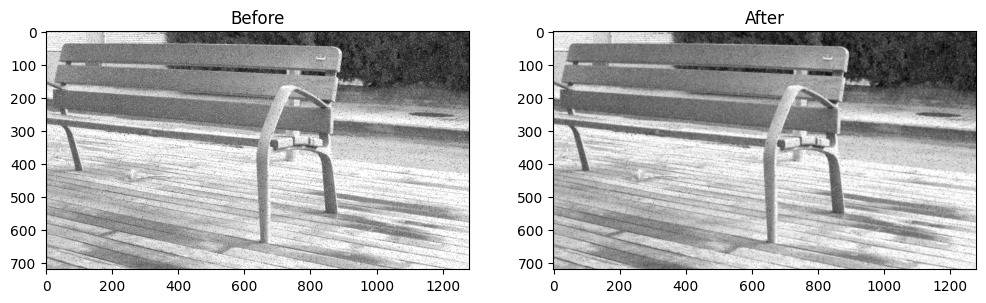

PSNR score of mean filter:  31.605849430056452


In [7]:
img_noise = "ex1_images/noise.png" # <- need to specify the path to the noise image
img_gt = "ex1_images/ori_img.png" # <- need to specify the path to the gt image
img = read_img(img_noise)
filter_size = 3

# Mean filter
mean_smoothed_img = mean_filter(img, filter_size)
show_res(img, mean_smoothed_img)
print('PSNR score of mean filter: ', psnr(img, mean_smoothed_img))

# Median filter
median_smoothed_img = median_filter(img, filter_size)
show_res(img, median_smoothed_img)
print('PSNR score of median filter: ', psnr(img, median_smoothed_img))